**Author:** Priyadharsshini Sakrapani

In [44]:
# Importing Pandas library and the 'starwars.csv' file
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

df = pd.read_csv('population.csv', keep_default_na=False)
df 

,Continent,Country,Year,Population,Yearly%Change,YearlyChange,MedianAge,UrbanPopulation
0,Asia,Afghanistan,1955,8270991,1.30,103775,19.2,587818
1,Asia,Afghanistan,1960,8996973,1.70,145196,18.8,755797
2,Asia,Afghanistan,1965,9956320,2.05,191869,18.4,984350
3,Asia,Afghanistan,1970,11173642,2.33,243464,17.9,1295433
4,Asia,Afghanistan,1975,12689160,2.58,303104,17.3,1717422
...,...,...,...,...,...,...,...,...
4225,Africa,Zimbabwe,2016,14030331,1.56,215702,18.5,5215894
4226,Africa,Zimbabwe,2017,14236595,1.47,206264,18.5,5328766
4227,Africa,Zimbabwe,2018,14438802,1.42,202207,18.5,5447513
4228,Africa,Zimbabwe,2019,14645468,1.43,206666,18.5,5571525


### This line plot shows the population of Canada between the years 1955 and 2020.

/var/folders/4j/s8lr7rlj0lx2bcwnx6rv0_b40000gn/T/ipykernel_15263/3359615614.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(new_yticklabels)


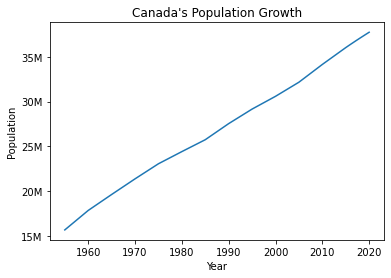

In [45]:
fig, ax = plt.subplots()
# Filtering 'Canada' and storing it as separate dataset
canada_df = df.loc[df["Country"] == "Canada"]
# Plotting the 'Year' and 'Population' from the above dataset
plt.plot(canada_df['Year'], canada_df['Population']) 
new_yticklabels = ["0M","15M", "20M", "25M", "30M", "35M"]
ax.set_yticklabels(new_yticklabels)
plt.xlabel('Year')
plt.title("Canada's Population Growth")
plt.ylabel('Population')
plt.show()

### This line plot shows the percentageof the world’s population that are living in urban areas. This has increased from low 30% to mid 50% over the past 60 years.

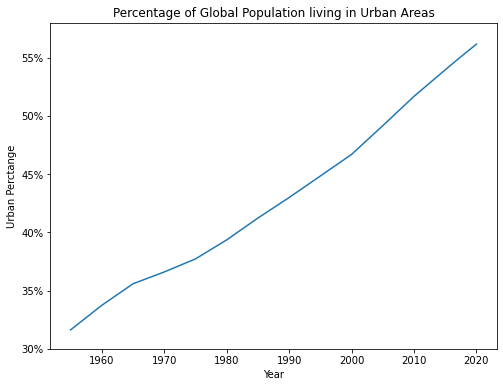

In [46]:
fig, ax = plt.subplots(figsize=(8,6))
# Taking the sum of 'Population' and 'UrbanPopulation'
aggregation = {'Population': 'sum', 'UrbanPopulation': 'sum'}
# Grouping based on year and applying the above aggregation
groupbyyear = df.groupby('Year', as_index=False).agg(aggregation)
# Calculating the percentage of urban population
groupbyyear["UrbanPopulationPercentage"] = (groupbyyear['UrbanPopulation']/groupbyyear['Population'])*100
plt.plot(groupbyyear["Year"], groupbyyear["UrbanPopulationPercentage"])
plt.ylim(30,58)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
plt.xlabel('Year')
plt.title("Percentage of Global Population living in Urban Areas")
plt.ylabel('Urban Perctange')
plt.show()

### This line plot shows the yearlypopulation change (absolute number) per continent over the past 60 years.

/var/folders/4j/s8lr7rlj0lx2bcwnx6rv0_b40000gn/T/ipykernel_15263/4291517303.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(new_yticklabels)
/var/folders/4j/s8lr7rlj0lx2bcwnx6rv0_b40000gn/T/ipykernel_15263/4291517303.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(new_yticklabels)
/var/folders/4j/s8lr7rlj0lx2bcwnx6rv0_b40000gn/T/ipykernel_15263/4291517303.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(new_yticklabels)
/var/folders/4j/s8lr7rlj0lx2bcwnx6rv0_b40000gn/T/ipykernel_15263/4291517303.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(new_yticklabels)
/var/folders/4j/s8lr7rlj0lx2bcwnx6rv0_b40000gn/T/ipykernel_15263/4291517303.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(new_yticklabels)
/var/folders/4j/s8lr

<module 'matplotlib.pyplot' from '/Users/priyadharsshinis/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

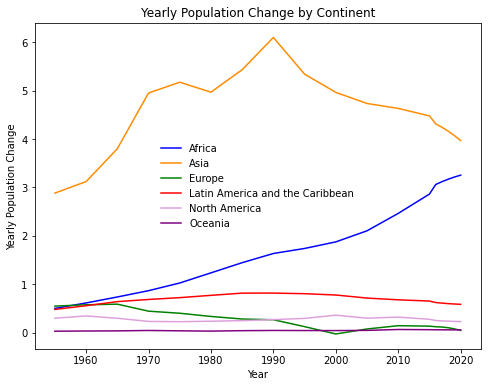

In [47]:
def yearly_population_change(df):
    fig, ax = plt.subplots(figsize=(8,6))
    # Taking the sum of 'YearlyChange'
    agg_dict = {'YearlyChange': 'sum'}
    # Defining the Continents to iterate later
    continents = ['Africa', 'Asia', 'Europe', 'Latin America and the Caribbean','North America','Oceania']
    # Defining the colors to use for each continent
    color = ['blue', 'darkorange', 'green', 'red', 'plum', 'purple']
    for i,con in enumerate(continents):
        fil = df.loc[df["Continent"] == con]
        filtered = fil.groupby(['Year'],as_index=False).agg(agg_dict)
        new_yticklabels = ["0","0","1","2", "3", "4", "5","6"]
        ax.set_yticklabels(new_yticklabels)
        ax.plot(filtered['Year'], filtered['YearlyChange'], c=color[i], label = con)
        plt.xlabel('Year')
        plt.title("Yearly Population Change by Continent")
        plt.ylabel('Yearly Population Change')
        plt.legend(loc='center', framealpha=0)
    return plt

yearly_population_change(df)


### This scatter plot shows the median age and percentage population growth (Yearly%Change) from the year 2019 to 2020 for all the countries of the world. Each country is colour coded according to its continent.

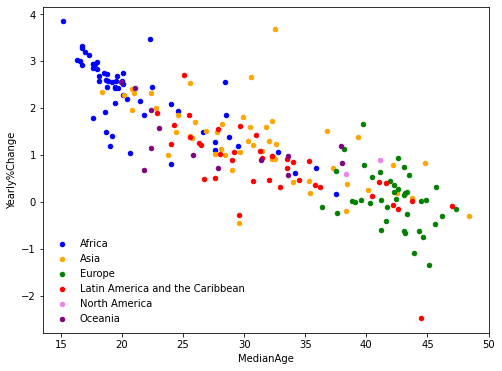

In [48]:
def make_plot(df):
    fig, ax = plt.subplots(figsize=(8,6))
    # Associating the continet with color using dictionery
    colors = {'Asia':'orange', 'Africa':'blue', 'Europe':'green', 'Latin America and the Caribbean':'red', 'North America':'violet', 'Oceania':'purple'}
    # Filtering the year and ignoring 0 age
    filtered = df.loc[(df["Year"] == 2020) & (df['MedianAge'] != 0)]
    grouped = filtered.groupby('Continent')
    for continent, group in grouped:
        group.plot(ax=ax, kind='scatter', x='MedianAge', y='Yearly%Change', label=continent, color=colors[continent])
    plt.legend(loc='lower left', frameon=False)
    plt.show()

make_plot(df)

### This bar plot shows the population of the top 10 most populous countries in 2020.

/var/folders/4j/s8lr7rlj0lx2bcwnx6rv0_b40000gn/T/ipykernel_15263/2456890015.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<module 'matplotlib.pyplot' from '/Users/priyadharsshinis/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

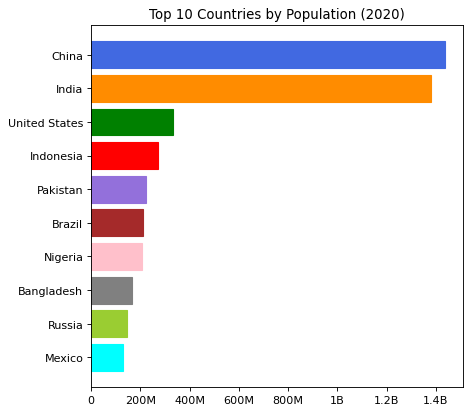

In [49]:
def most_populous_countries(df):
    fig, ax = plt.subplots(figsize=(6,6), dpi=80)
    filtered = df.loc[df["Year"] == 2020]
    mostPopulousCountries = filtered.sort_values('Population', ascending = False).head(10)
    mostPopulousCountries.sort_values('Population',inplace=True)
    xticklabels = ['0','200M','400M','600M','800M', '1B', '1.2B', '1.4B']
    ax.set_xticklabels(xticklabels)
    ax.set_title("Top 10 Countries by Population (2020)")
    barlist = plt.barh(mostPopulousCountries['Country'], mostPopulousCountries['Population'])
    barlist[0].set_color('cyan')
    barlist[1].set_color('yellowgreen')
    barlist[2].set_color('grey')
    barlist[3].set_color('pink')
    barlist[4].set_color('brown')
    barlist[5].set_color('mediumpurple')
    barlist[6].set_color('red')
    barlist[7].set_color('green')
    barlist[8].set_color('darkorange')
    barlist[9].set_color('royalblue')
    return plt

most_populous_countries(df)